<a href="https://colab.research.google.com/github/JaffySherlinA/PRODIGY_DS_04/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/twitter_training - twitter_training.csv.csv')

In [ ]:
data.head()

,year,place,sign,sentences
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('/content/twitter_training - twitter_training.csv.csv', names=col_names)

In [ ]:
df.head()

,ID,Entity,Sentiment,Content
0,year,place,sign,sentences
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(74682, 4)

In [ ]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      year        place      sign   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0                                              sentences  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]>

In [ ]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      858
dtype: int64

In [ ]:
df.dropna(axis=0 , inplace=True)

In [ ]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [ ]:
df.duplicated().sum()

2691

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(71133, 4)

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21579
Positive      19561
Neutral       17542
Irrelevant    12450
sign              1
Name: count, dtype: int64

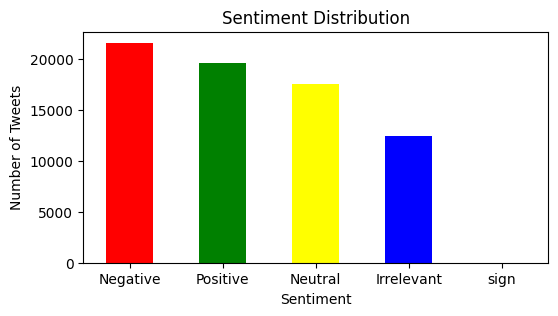

In [ ]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [ ]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Sentiment
Neutral       806
Negative      743
Positive      571
Irrelevant    165
Name: count, dtype: int64

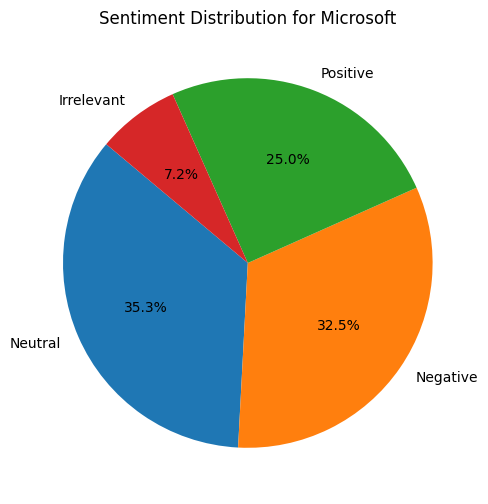

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-36-85348b4ae7ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=df.columns[1], order=df[df.columns[1]].value_counts().index, palette='Blues_d')


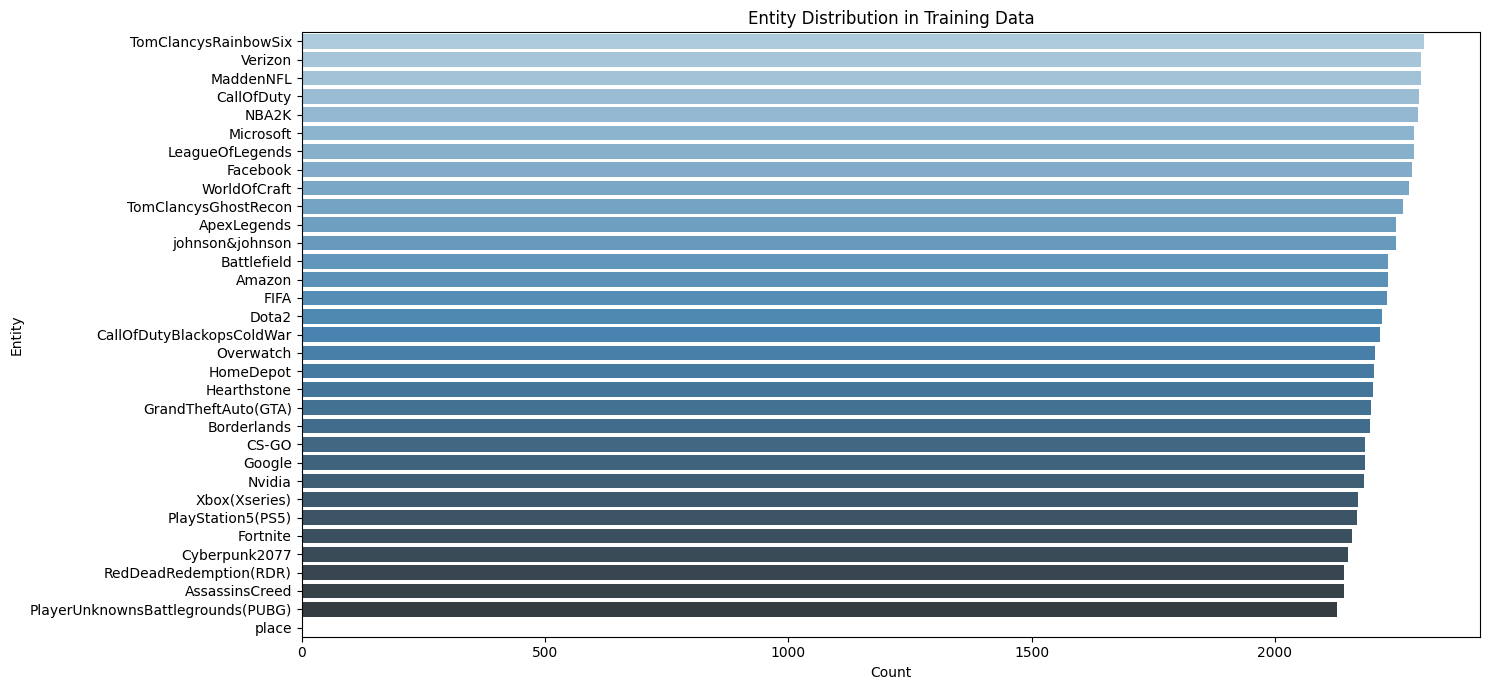

In [ ]:
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=df, y=df.columns[1], order=df[df.columns[1]].value_counts().index, palette='Blues_d')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category= FutureWarning)

In [ ]:
df['message_length'] = df[df.columns[3]].apply(len)

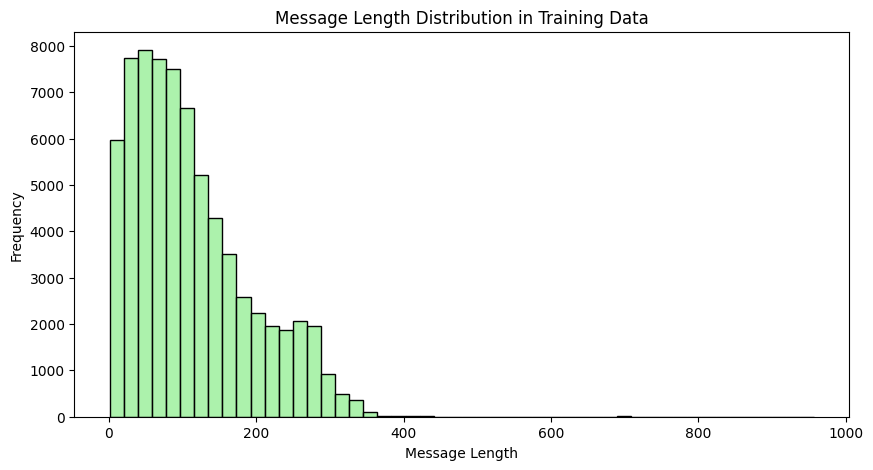

In [ ]:
fig, ax = plt.subplots(1,figsize=(10, 5)) # Unpack the figure and axes

# Plot message length distribution for training data
sns.histplot(df['message_length'], bins=50, color="lightgreen", ax=ax)  # Specify the axes
ax.set_title('Message Length Distribution in Training Data')
ax.set_ylabel('Frequency')
ax.set_xlabel('Message Length')

plt.show()

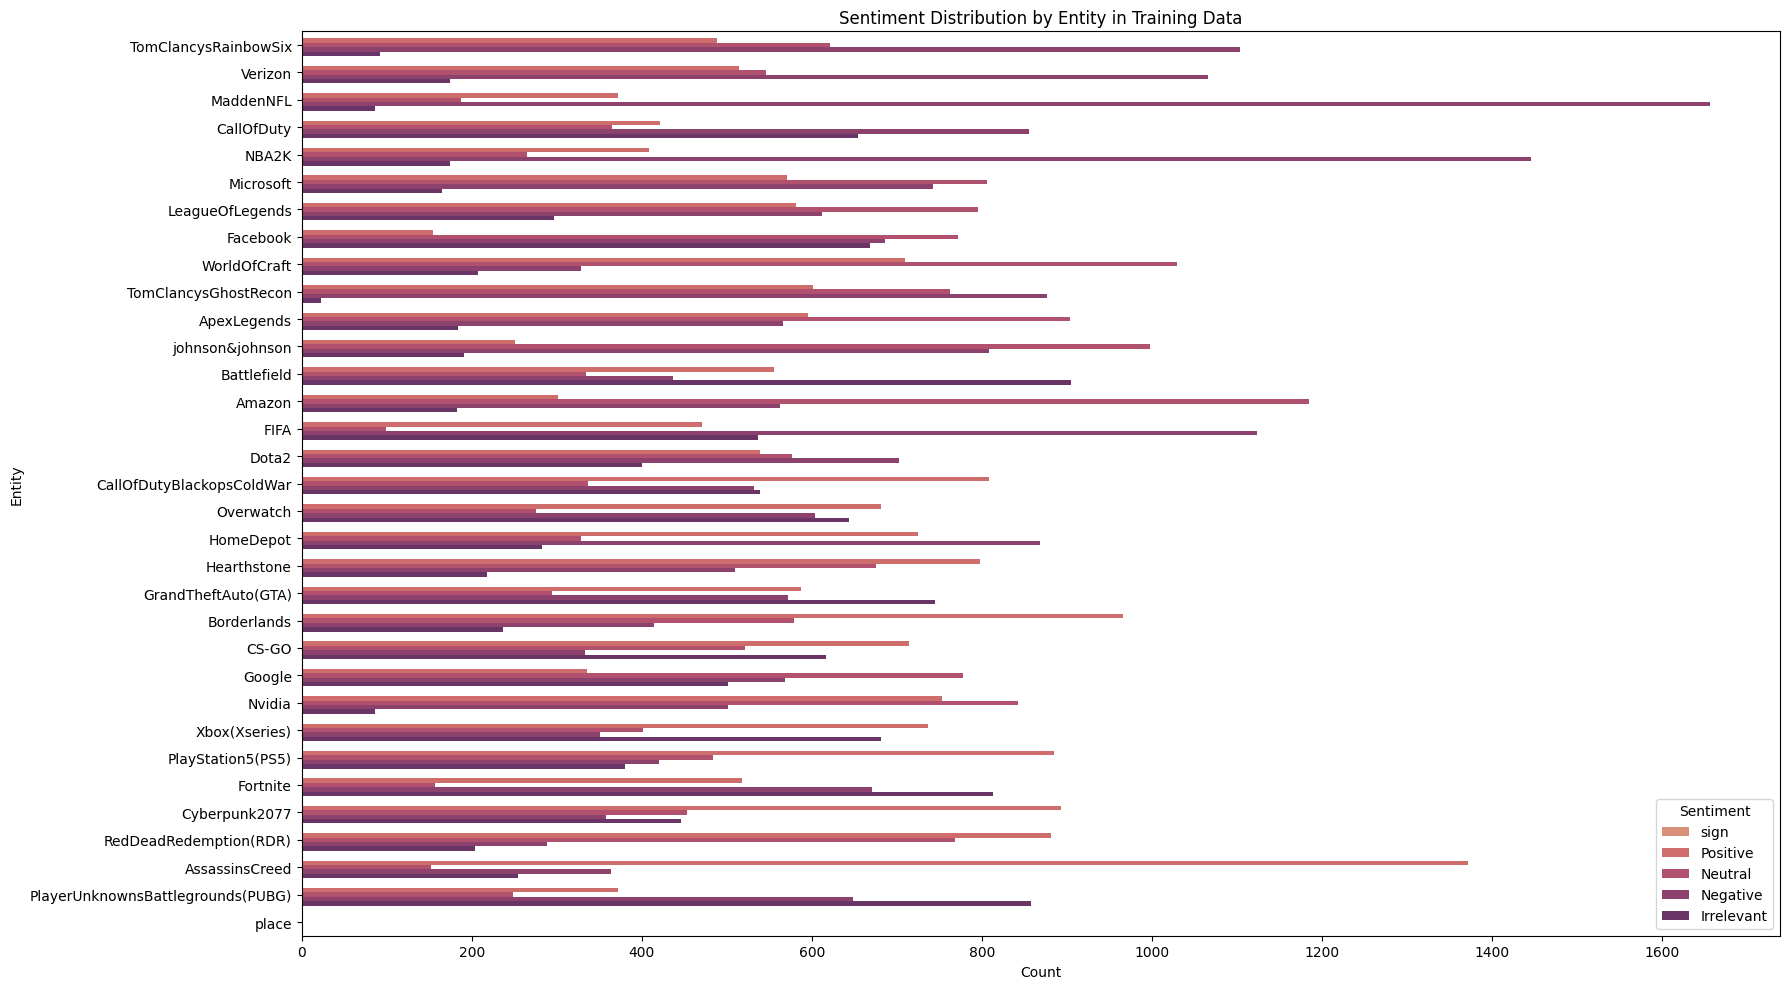

In [ ]:
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=df, y=df.columns[1], hue=df.columns[2], order=df[df.columns[1]].value_counts().index, palette="flare")
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()